In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap



/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: 

In [12]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sc.settings.figdir = "supp"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


In [2]:
key_celltype = "broad_celltypes"

In [3]:
DATA_PREPARED=True
DATA_PREPARED_T=True



In [4]:
if not DATA_PREPARED:
    adata=sc.read_h5ad('/nfs/team361/ls34/inflow/adata_10ad_spatial.h5ad')
else:
   #adata=sc.read_h5ad('/nfs/team361/ls34/adata_mm_spatial_prepped.h5ad')
    adata=sc.read_h5ad('/nfs/team361/ls34/inflow/final_adatas/adata_eczema_spatial_prepped.h5ad')

try:
    adata.obs["NICHE_NAMES"] = adata.obs["niche_name"]
except:
    adata
    
  

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 197487 × 1032
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'sample_id', 'Sanger patient ID', 'Drug', 'Responder', 'Timepoint', 'Site_status', 'info_id', 'sample', 'niche_name', 'lvl1', 'lvl0', 'veryfine_celltypes_new5', 'veryfine_celltypes_new5_incprolif', 'veryfine_celltypes', 'fine_celltypes_new', 'mod_celltypes_new', 'broad_celltypes_new', 'Site_status_binary', 'fine_celltypes', 'broad_celltypes', 'n_counts', 'n_genes', 'inflow_cell_type', 'inflow_biological_batch_ID', 'inflow_slice_ID', 'inflow_signaling_activity', 'leiden_res0.8', 'leiden_res0.5', 'NICHE_NAMES', 'spatial_niche', 'key_celltype_new'
    uns: 'NICHE_NAMES_colors', 'de_leiden', 'inflow_biological_batch_ID_colors', 'inflow_cell_type_colors',

In [5]:
CATEGORY="spatial_niche"
 

In [7]:
gene_programme = ['CD3E',
 'CXCR4',
 'CYBA',
 'CD4',
 'CCR4',
 'ITGB2',
 'ADAM8',
 'TNFRSF1B',
 'PLEC',
 'JAK3',
 'IL2RG',
 'FSCN1',
 'CD5',
 'SELPLG',
 'ACAP1',
 'ITGAL',
 'IKZF1',
 'CD247',
 'CD83',
 'CCL22',
 'CCR7',
 'CCL17',
 'MYH9',
 'RUNX3',
 'CFLAR',
 'BATF',
 'ZAP70',
 'LAMP3',
 'ALOX15',
 'UCP2',
 'FOXP3',
 'SEPTIN9',
 'CCL19',
 'GRK2',
 'MIAT',
 'CD6',
 'TNFRSF18',
 'IKZF3',
 'TCF7',
 'PIM2',
 'IL21R',
 'CTLA4',
 'CD7',
 'MSN',
 'SLC2A3',
 'TRAF1',
 'RFTN1',
 'FURIN',
 'SH2D2A',
 'SERPINB9',
 'IL2RB',
 'IRF4',
 'IL2RA',
 'RASGRP1',
 'CD96',
 'CSF2RB',
 'CD27',
 'TAP1',
 'TUBB',
 'TMEM173',
 'ZYX',
 'CD1B',
 'CD8A',
 'GIMAP5',
 'CLEC10A',
 'CDKN1A',
 'CD44',
 'TIGIT',
 'IRF1',
 'CD1E',
 'CTSH',
 'CST7',
 'MMP9',
 'ARF6',
 'PKM',
 'KCNN4',
 'PPP1CA',
 'CSF2RA',
 'SPI1',
 'CD40LG',
 'CFP',
 'HNRNPH1',
 'MMP12',
 'ADAM12',
 'CIITA',
 'PFKFB3',
 'PGK1',
 'CD274',
 'FLII',
 'HSPA8',
 'TNFRSF9',
 'LMNB1',
 'NR4A3',
 'DUSP5',
 'WDFY4',
 'HCK',
 'CD1C',
 'CXCR3',
 'SND1',
 'CD99',
 'EBI3',
 'PRDM1',
 'TUBB2B',
 'CD1A',
 'XBP1',
 'CPVL',
 'MCM5',
 'CTBP1',
 'TENT5C',
 'ADAR',
 'SF3A1',
 'FCER1A',
 'CCAR2',
 'SORL1',
 'NAP1L4',
 'MICAL2',
 'TNF',
 'ITGAX',
 'HNRNPA1L2',
 'DDX6',
 'ICAM1',
 'DDX39B',
 'PARK7',
 'ZMIZ2',
 'HYOU1',
 'IRF8',
 'ALOX5',
 'TNFRSF8',
 'ITGAE',
 'HNRNPUL1',
 'LTA',
 'GZMA',
 'LAG3',
 'AP3D1',
 'SOAT1',
 'MAL',
 'KHDRBS1',
 'SLC7A5',
 'CD82',
 'OGDH',
 'LAIR2',
 'ACHE',
 'ILF3',
 'PIM1',
 'FCGBP',
 'KDM6B',
 'SMARCC1',
 'GLS',
 'RBMX',
 'CSF1R',
 'ALYREF',
 'KRTCAP2',
 'PLAUR',
 'CCR2',
 'PRPF8',
 'IDO1',
 'HNRNPM',
 'PDIA3',
 'GZMB',
 'RHOA',
 'TES',
 'LPIN1',
 'PRRC2A',
 'NONO',
 'FPR1',
 'AP1B1',
 'IL17RB',
 'CPSF6',
 'PRKAR1A',
 'MAP7D1',
 'PDIA4',
 'DNM2',
 'SOCS3',
 'TSPAN14',
 'KLF16',
 'PADI2',
 'HDC',
 'CD207',
 'HPGD',
 'HNRNPF',
 'APMAP',
 'CSF2',
 'GANAB',
 'CTSG',
 'DNASE1L3',
 'HNRNPD',
 'POLR2A',
 'SNRPB',
 'CTSC',
 'RPN1',
 'SDHA',
 'NR1H2',
 'NCOR2',
 'XRCC6',
 'ICAM2',
 'CCL18',
 'XRCC5',
 'GZMH',
 'CMA1',
 'IL13']

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


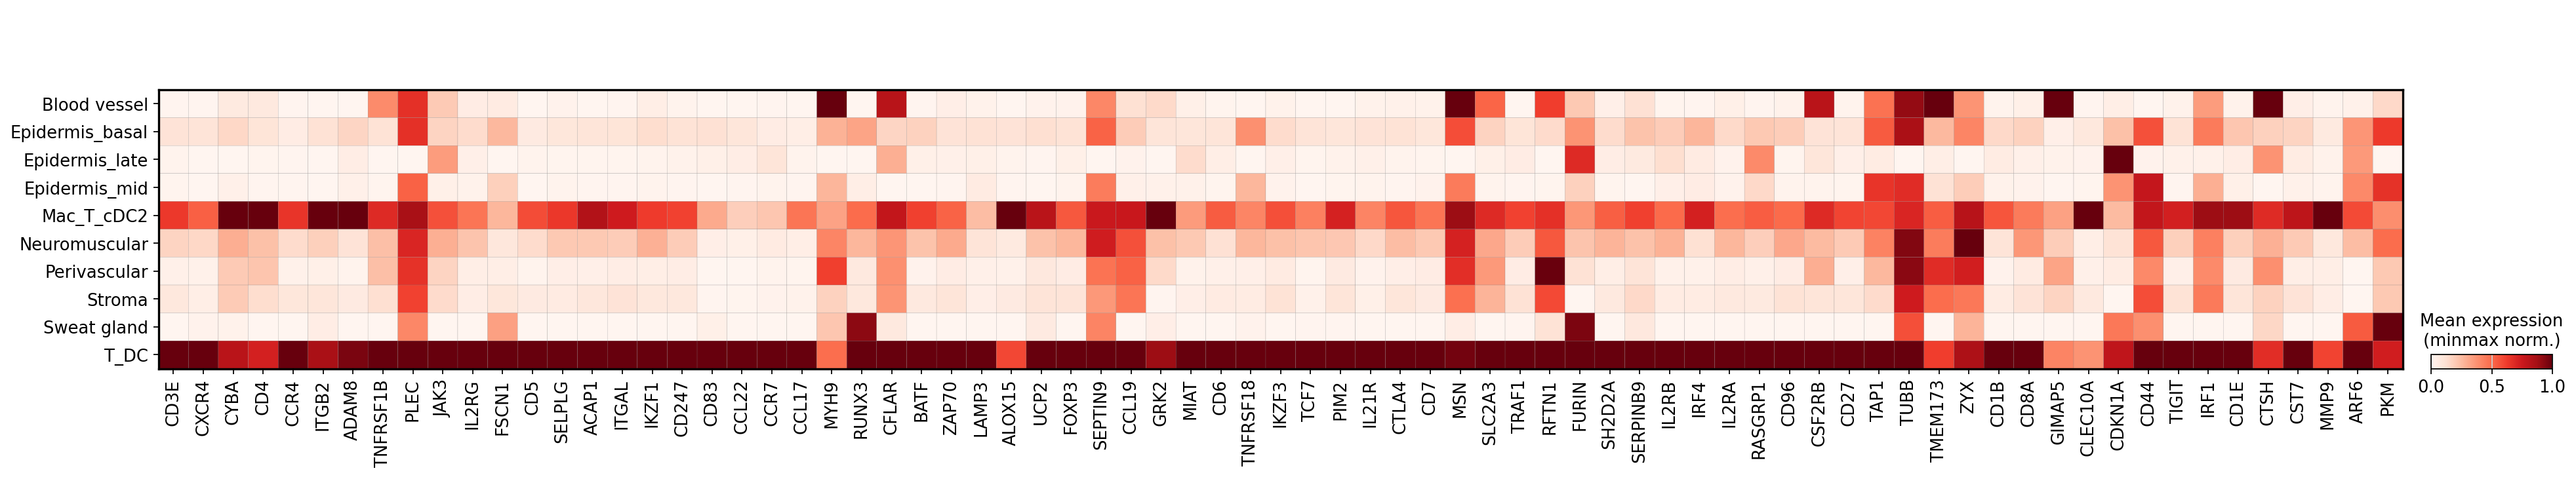

In [13]:
sc.pl.matrixplot(
    adata,
    gene_programme[:75],
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    cmap="Reds",
    colorbar_title="Mean expression\n(minmax norm.)",
    save="Tzone_MGP.pdf"

)



# fig 2a

BK21_Lesional Baseline
BK22_Lesional Baseline
BK30_Lesional Baseline
BK30_Day 14
BK18_Lesional Baseline
BK23_Non-lesional Baseline
BK39_Lesional Baseline


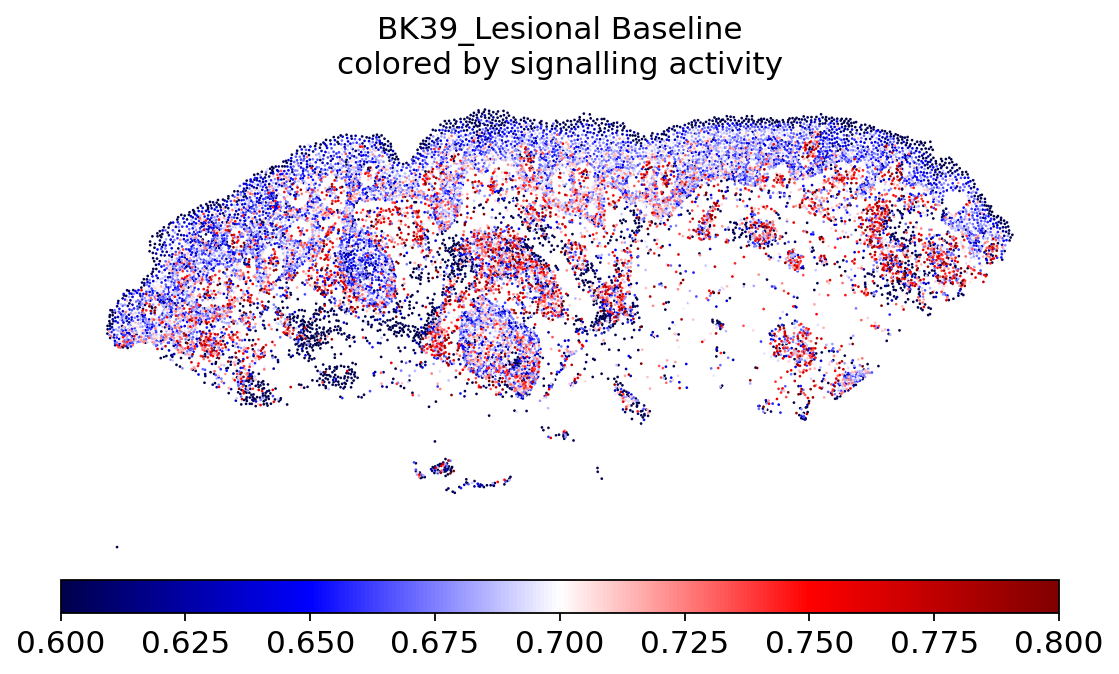

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


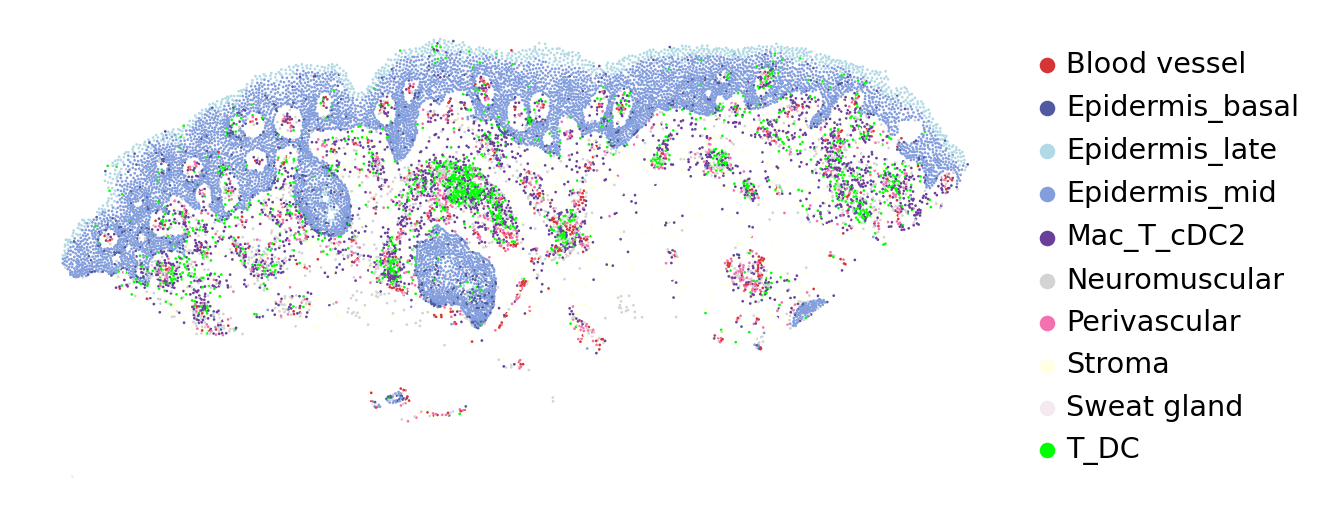

BK23_Lesional Baseline
BK27_Non-lesional Baseline
BK39_Non-lesional Baseline


In [14]:
for slice_id in set(adata.obs['inflow_slice_ID']):
    print(slice_id)
    if slice_id == "BK39_Lesional Baseline":


        sc.pl.spatial(
            adata[adata.obs['inflow_slice_ID'] == slice_id],
            color=['inflow_signaling_activity'],
            spot_size=10.0,
            wspace=0.5,
            cmap='seismic',
            title=['{}\ncolored by signalling activity'.format(slice_id)],
            colorbar_loc='bottom',
                        vmin=0.6, vmax=.8,
                                save="MINTFLOW_skinpaper_signalling.pdf"
    

        )

        sc.pl.spatial(
            adata[adata.obs['inflow_slice_ID'] == slice_id],
            color=['spatial_niche'],
            spot_size=10.0,
            wspace=0.5,
            cmap='Reds',
            title=[''],
            colorbar_loc='bottom',
                        vmin=0.6,
                   save="MINTFLOW_skinpaper_domains.pdf"


        )

In [15]:
stop

NameError: name 'stop' is not defined

In [ ]:
for slice_id in set(adata.obs['inflow_slice_ID']):
    print(slice_id)
    if slice_id == "BK22_Lesional Baseline":


        sc.pl.spatial(
            adata[adata.obs['inflow_slice_ID'] == slice_id],
            color=['inflow_signaling_activity'],
            spot_size=20.0,
            wspace=0.5,
            cmap='seismic',
            title=['{}\ncolored by signalling activity'.format(slice_id)],
            colorbar_loc='bottom',
                        vmin=0.6, vmax=.9,
                                save="signalling_spatial.pdf"


        )

        sc.pl.spatial(
            adata[adata.obs['inflow_slice_ID'] == slice_id],
            color=['spatial_niche'],
            spot_size=20.0,
            wspace=0.5,
            cmap='Reds',
            title=[''],
            colorbar_loc='bottom',
                        vmin=0.6,
                    save="spatial_domains_spatial.pdf"


        )

In [ ]:
colors={'Adipocyte': '#B8860B',
 'F1: Superficial': '#FFFFE4',
 'F1: Regenerative': '#FFFFE4',

'F2/3: Stroma_PPARG+': '#78b5d7',
 'F2: Universal': '#d0e1f2',
 'F3: FRC-like': '#fbd4d7',
 'F4: DS_DPEP1+': '#d3eec9',
 'F4': '#80ca80',
 'F5': '#788bd2',
 'F5: RAMP1+': '#9e99c9',
 'F6: Inflammatory myofibroblast': '#00ffff',
 'KC1-2': '#505aa1',
 'KC2/3_cycling': '#007FFF',
 'KC3': '#839edd',
 'KC4': '#b1dae6',
 'KC5': '#c8cada',
 'KC_HF: Basal': '#006400',
 'KC_HF: IRS+HS': '#abe8bd',
            "'KC_HF: IRS+HS_medulla": "#bff2cd",

 'KC_HF': '#94cb72',
 'KC_SC: LGR6+ACTA2+': "#008080",#'#004444',
 'KCinflamm': '#f4e9ef',
 'KCinflamm_late': '#D49BB1',
 'LC': '#63D7F0',
# 'LC_CCR7+': '#5F3D7D',
 'LC_SLC18A2+': '#3bc1d9',
 'LE': '#FFFF00',
 'Mac': '#845DAE',
 'Mac2_CCL14hi': '#4F2F6D',
 'Mast cell': '#FF1493',
 'Melanocyte': '#6f3a3a',
 'MigDC': '#00FF00',
 'Muscle': '#f371af',
 'Nonspecific': '#D3D3D3',
 'Peri1_CCL19+': '#F7A3C3',
 'Peri2': '#D04A8A',
 'Plasma cell': '#ff5e00',
 'Sebocyte': '#e28743',
 'KC_Sebocyte_inner': '#ffd1a3',
 'Sweat gland': '#00CCCC',
 'Sweat gland channel': '#2DA8A0',
 'Sweat gland channel_inner': "#FFE5B4",#'#D1F9F6',
# 'Sweat gland channel outer': 'Sweat gland channel outer',
 'Sweat gland channel_outer': "#B3FFF0",#'#40E0D0',
   'T': '#F4D1A1',
    'T_Prolif': '#D4B082',
    'Tc': '#8C6A3B',
    'Tc_ITGAEhi_IL13': '#F87A7B',
    'Tnaive/Tcm': '#C6A476',
    'Treg': '#9E7A55',
    'Treg_LRRC32': "#9E5E3A",#'#7E5F43',
 'VE': '#9f1a1a',
 'VE1': '#660000',
 'VE3_SELPhi': '#d73435',
 'cDC1': '#9B70C1',
 'cDC2': '#6F478C',
  'cDC2: MMP12+': '#7D56A3',
 'Schwann': '#3A3A30',
 'nmSchwann': '#0A0A0A',
 'pDC': '#D85B8C',
        
        
        
### scrna only
        'AXL+SIGLEC6+ DC': "#9b4ef5",
'Bcell': "#e14d00",
'Cartilage': "#404040", 
'F4: DP_HHIP+': "#26a83f",
'F6: Inflammatory myofibroblast': "#00ffff",
'F_Fascia': "#000000",
'ILC1_3': "#FFFF00",
'ILC1_NK': "#F4D03F",
'ILC2': "#F1C40F",
'ILC2_inflammatory': "#C79A00",
'KC1': "#3a4e7a",
'KC2': "#505aa1",
'KC_HF: Basal_LGR5+': "#00b300",
'KC_HF: Basal_NPNT+': "#006400",
'KCinflamm_basal': "#f9f3fb",
'KCinflamm_cycling':"#e0c5d2",
'KCinflamm_int': "#f5d3e7",
'LC_CCR7+': "#3bc1a4",
'Mac1': "#6A3F9B",
'MacTREM2_CX3CR1+': "#9D1A80",
'Merkel cell': "#2f2f2f",
'MoDC': "#7F00A2",
"MoDC/cDC2: MMP12+": "#7F00A2",
        
'Mono': "#D8A7FF",
'Mono CD16+': "#E1C6FF",
'NK': "#FFEB3B",
'Neutrophil': "#4D3F8C",
'Satellite muscle': "#F387C7",
'Skeletal muscle': "#F14D8E",
'Tc_IFNGhi': "#F5A600",
'Tc_IL17': "#B84A3D",#"#A75C3E",
'Tc_ZNF683+/γδ': "#D4B082",
'Th': "#F4D1A1",
'Tr1': "#5F452F", 
'cDC2: IL1B+': "#B78FE1",
       
       }

 

In [ ]:
 COLORS = {'Mac_T_cDC2': '#6A3F9B',
          'Neuromuscular': '#D3D3D3',
# 'Stroma_deep': "#f6d17a", 
 'T_rich': "#dcb0f2",#'#F4D1A1',
 'Blood vessel': '#d73435',
 'T_DC': '#00FF00',
 'Appendage': "#e28743", #'#94cb72',
 'Sweat gland': '#839edd',
 'Epidermis_late': '#b1dae6',
 'Perivascular': '#f371af',
 'Stroma':'#FFFFE4', # '#f6d17a',
 'Epidermis_mid': '#839edd',
 'Sweat gland': '#f4e9ef',
 'Epidermis_basal': '#505aa1'}
colors=COLORS


adata.obs['spatial_niche']=adata.obs['spatial_niche'].astype('category')
adata.uns['spatial_niche_colors'] = [COLORS[cat] for cat in adata.obs['spatial_niche'].cat.categories]



In [ ]:
ADATA = adata[adata.obs["Site_status_binary"].isin(["Lesional", "Nonlesional"])]

df = ADATA.obs.groupby(["Site_status_binary", "spatial_niche"]).size().unstack(fill_value=0)
df_norm = df.div(df.sum(axis=1), axis=0)
df_norm = df_norm.loc[:, df_norm.mean() >= 0.002]

color_list = [COLORS.get(cat, "#D3D3D3") for cat in df_norm.columns]

fig, ax = plt.subplots(figsize=(2, 5))
df_norm.plot(kind="bar", stacked=True, color=color_list, edgecolor="black", ax=ax, linewidth=0.8)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")

plt.xlabel(" ")
plt.ylabel("Proportion")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# fig 2c

In [ ]:
df = ADATA.obs.groupby(["Site_status_binary", "spatial_niche"]).size().unstack(fill_value=0)
df_norm = df.div(df.sum(axis=1), axis=0)
df_norm = df_norm.loc[:, df_norm.mean() >= 0.002]

color_list = [COLORS.get(cat, "#D3D3D3") for cat in df_norm.columns]

fig, ax = plt.subplots(figsize=(6, 2))
df_norm.plot(kind="barh", stacked=True, color=color_list, edgecolor="black", ax=ax, linewidth=0.8)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")
plt.xlabel("Proportion")
plt.ylabel(" ")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False, ncol=3)

plt.tight_layout()
plt.savefig("figures/extrinsic_bysitestatus.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
RENAME= {'KC1-2': 'KC1-2',
 'Melanocyte': 'Melanocyte',
 'KCinflamm_basal/int': 'KCinflamm_basal/int',
 'KC2/3_cycling': 'KC2/3_cycling',
 'KC3': 'KC3',
 'F3: FRC-like': 'Fibroblast',
 'Mac2': 'Mac',
 'F1: Superficial': 'Fibroblast',
 'Treg': 'T',
 'cDC2': 'cDC2',
 'Nonspecific': 'Nonspecific',
 'VE': 'VE',
 'T': 'T',
 'Mast cell': 'Mast cell',
 'F2: Universal': 'Fibroblast',
 'LE': 'LE',
 'cDC1': 'cDC1',
 'F2/3: Stroma_PPARG+': 'Fibroblast',
 'MigDC': 'MigDC',
 'Tc_IL13': 'T',
 'Smooth muscle': 'Smooth muscle',
 'KC_HF': 'KC_HF',
 'KC_Sebocyte': 'KC_HF',
 'Sweat gland channel': 'Sweat gland',
 'Adipocyte': 'Adipocyte',
 'pDC': 'pDC',
 'Pericyte1_CCL19+': 'Pericyte',
 'KC5': 'KC5',
 'KCinflamm_late': 'KCinflamm_late',
 'KC4': 'KC4',
 'Schwann': 'Schwann',
 'Mac2_CCL14hi': 'Mac',
 'LC': 'LC',
 'MoDC/cDC2': 'MoDC/cDC2',
 'T_Prolif': 'T',
 'Sweat gland': 'Sweat gland',
 'Pericyte2_CASQ2+': 'Pericyte',
 'F4: Hair follicle-associated': 'Fibroblast',
 'F5: Schwann-like': 'Fibroblast',
 'Plasma cell': 'Plasma cell'}

adata.obs["key_celltype_new"] = adata.obs[key_celltype].map(RENAME)

COLORS = {
    'KC1-2': '#505aa1',
    'Melanocyte': '#6f3a3a',
    'KCinflamm_basal/int': '#f4e9ef',
    'KC2/3_cycling': '#007FFF',
    'KC3': '#839edd',
    'Fibroblast': '#FFFFE4',
    'Mac': '#1B03A3',
    'T': '#E0A87F',
    'cDC2': '#6F478C',
    'Nonspecific': '#D3D3D3',
    'VE': '#d73435',
    'Mast cell': '#FF5F00',
    'LE': '#FFFF00',
    'cDC1': '#9B70C1',
    'MigDC': '#00FF00',
    'Smooth muscle': '#f371af',
    'KC_HF': '#abe8bd',
    'KC_Sebocyte': '#ffd1a3',
    'Sweat gland channel': '#2DA8A0',
    'Adipocyte': '#FFFFFF',
    'pDC': '#D85B8C',
    'Pericyte': '#F7A3C3',
    'KC5': '#c8cada',
    'KCinflamm_late': '#D49BB1',
    'KC4': '#b1dae6',
    'Schwann': '#0A0A0A',
    'LC': '#3bc1d9',
    'MoDC/cDC2': '#7F00A2',
    'Sweat gland': '#FFEDD5',
    'Plasma cell': '#ff5e00'
}


adata.obs["key_celltype_new"]=adata.obs["key_celltype_new"].astype('category')
color_palette = [COLORS[cell_type] for cell_type in adata.obs["key_celltype_new"].cat.categories]


# supp fig 3b

In [ ]:
ADATA = adata
FONTSIZE = 20

ORDER = [
    'Epidermis_basal',
    'Epidermis_mid',
    'Epidermis_late',
    'Sweat gland',
    'Perivascular',
    'Blood vessel',
    'Stroma',
    'Neuromuscular',
    'Mac_T_cDC2',
    'T_DC',
]

df = ADATA.obs.groupby(["spatial_niche", "key_celltype_new"]).size().unstack(fill_value=0)
df_norm = df.div(df.sum(axis=1), axis=0)
df_norm = df_norm.loc[:, df_norm.mean() >= 0.002]
df_norm = df_norm.reindex(ORDER)

color_list = [COLORS.get(cat, "#D3D3D3") for cat in df_norm.columns]

fig, ax = plt.subplots(figsize=(12, 5))

df_norm.plot(kind="bar", stacked=True, color=color_list, edgecolor="black", ax=ax, linewidth=.8, width=0.5)

plt.xticks(fontsize=FONTSIZE, rotation=90)
plt.yticks(fontsize=FONTSIZE)
plt.xlabel(" ", fontsize=10)
plt.ylabel("Proportion", fontsize=FONTSIZE)
ax.legend(fontsize=14)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="", bbox_to_anchor=(0.5, -1), loc="upper center", frameon=False, ncol=5, fontsize=14)

ax.set_xticklabels(ORDER, rotation=90, fontsize=FONTSIZE)

plt.tight_layout()
plt.savefig("eczema_domain_cellcomposition.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST




# T cells

In [ ]:
if not DATA_PREPARED_T:
    adata_i = adata[adata.obs[key_celltype].str.startswith("T")]
    M_BAR_METRIC = 'inflow_Xbar_spl'
    adata_i
    
else:
    print("load prepped data")
    adata_i=sc.read_h5ad('/nfs/team361/ls34/inflow/final_adatas/adata_tcells.h5ad')
    COLOR = {
        'Dermis': '#EFE8D7',
        'Superficial': '#F87A7B'
    }
    adata_i.obs["t_cellsubtypes"] =adata_i.obs["t_cellsubtypes"].astype('category')
    adata_i.uns["t_cellsubtypes_colors"] = [COLOR[subtype] for subtype in adata_i.obs['t_cellsubtypes'].cat.categories]

In [ ]:
if not DATA_PREPARED_T:

    sc.pp.neighbors(adata_i, use_rep = M_BAR_METRIC, 
                    metric = "euclidean", n_neighbors=20)#key_added=neighbor_id)
    sc.tl.umap(adata_i, min_dist=0.1) #neighbor_key=)


    sc.pl.umap(adata_i,  
               color=[ "NICHE_NAMES", key_celltype],
               s=200,legend_loc="on data",
               legend_fontsize=8)

    RES=0.1
    sc.tl.leiden(adata_i, #restrict_to=(CATEGORY,subset_cluster), 
                 resolution=RES, random_state=1, key_added=f'leiden_res{RES}') #neighbors_key='neighbor_30')


    sc.pl.umap(adata_i,  
               color=[ key_celltype, f"leiden_res{RES}"],
               s=200,legend_loc="on data",
               legend_fontsize=8
              )

else:
    print("skip as data prepared")

In [ ]:
if not DATA_PREPARED_T:

    RENAME  = {'0': "Dermis",
               '1': "Dermis",
               '2': "Superficial" 
              }

    adata_i.obs["t_cellsubtypes"] =adata_i.obs[ f"leiden_res{RES}"].map(RENAME)#.fillna(adata_i.obs[ f"leiden_res{RES}"])
    sc.pl.umap(adata_i,  
               color=["t_cellsubtypes"],
               s=200,legend_loc="on data",
               legend_fontsize=8
              )
 

# fig 2h

In [ ]:
sc.pl.umap(
    adata_i,  
    color=["t_cellsubtypes"],
    s=200,
    legend_loc="on data",
    legend_fontsize=40,
    legend_fontoutline=2,
                edgecolor="black",
            linewidth=0.1,
    save = "umap_tcells_spatialdomain.pdf"
)

In [ ]:
# COLOR = {
#     'Dermis': '#D8C59A',
#     'Superficial': '#F87A7B'
# }
# color_palette = ListedColormap([COLOR[k] for k in COLOR.keys()])
for x in adata_i.obs["Sanger patient ID"].unique():
    adata_ii = adata_i[adata_i.obs["Sanger patient ID"] == x]
    if x == "BK22":
        sq.pl.spatial_scatter(
            adata_ii,
            library_id="spatial",
            shape=None,
            color='t_cellsubtypes',  
            size=100,
            title='',
            edgecolor="black",
            linewidth=0.1,
                save = "umap_tcells_spatialdomain_forhande.pdf"

            #palette=color_palette  
        )

In [ ]:
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(12, 12))

In [ ]:
# COLOR = {
#     'Dermis': '#D8C59A',
#     'Superficial': '#F87A7B'
# }
# color_palette = ListedColormap([COLOR[k] for k in COLOR.keys()])
for x in adata_i.obs["Sanger patient ID"].unique():
    adata_ii = adata_i[adata_i.obs["Sanger patient ID"] == x]
    if x == "BK22":
        sq.pl.spatial_scatter(
            adata_ii,
            library_id="spatial",
            shape=None,
            color='t_cellsubtypes',  
            size=50,
            title='',
            edgecolor="black",
            linewidth=0.1,

            legend_loc=None,
                save = "umap_tcells_spatialdomain_forhande_smaller.pdf"

            #palette=color_palette  
        )

In [ ]:
# COLOR = {
#     'Dermis': '#D8C59A',
#     'Superficial': '#F87A7B'
# }
# color_palette = ListedColormap([COLOR[k] for k in COLOR.keys()])
for x in ["BK30"]:
    adata_ii = adata[adata.obs["Sanger patient ID"] == x]
    adata_ii=adata_ii[adata_ii.obs["Timepoint"].str.startswith("L")]
    if x == "BK30":
        sq.pl.spatial_scatter(
            adata_ii,
            library_id="spatial",
            shape=None,
            color='broad_celltypes_new',  
            size=50,
            title='',
            edgecolor="black",
            linewidth=0.1,

            legend_loc=None,

            #palette=color_palette  
        )

In [ ]:
adata